In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction/Housing.csv


Importing necessary libraries

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

Importing the dataset and check for nulls and types

In [139]:
df=pd.read_csv("/kaggle/input/housing-price-prediction/Housing.csv")
print(df.info())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom        

Data Preprocessing and Exploratory Data Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


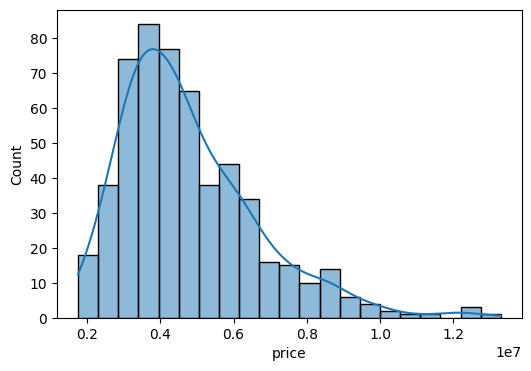

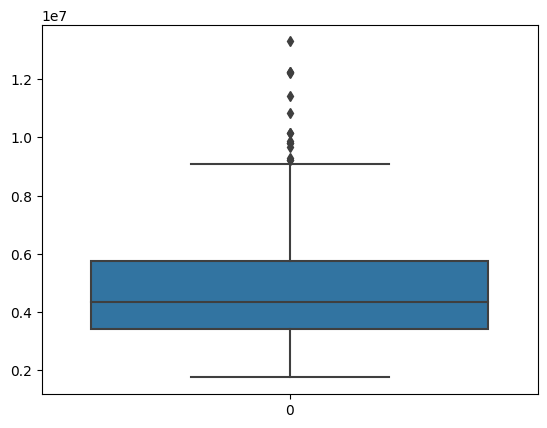

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


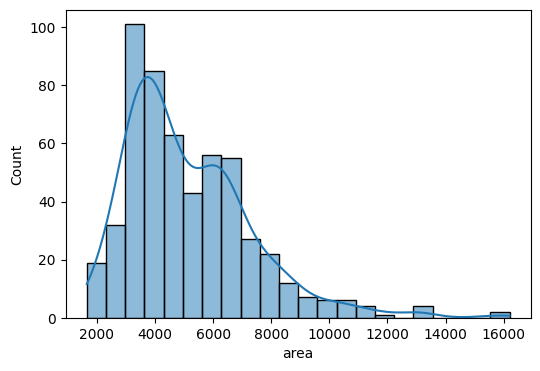

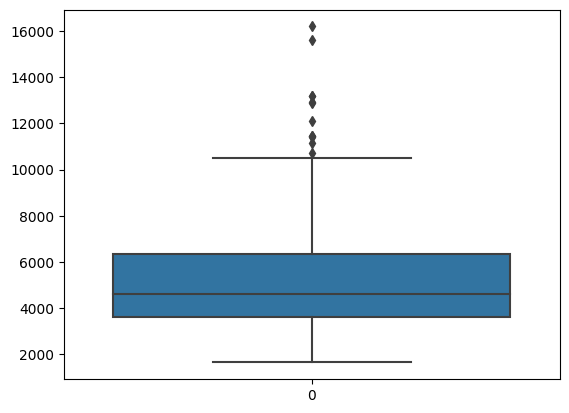

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


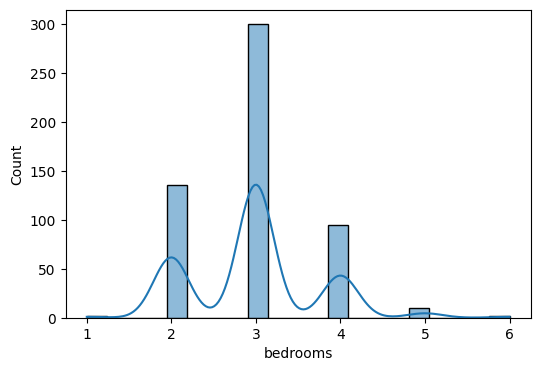

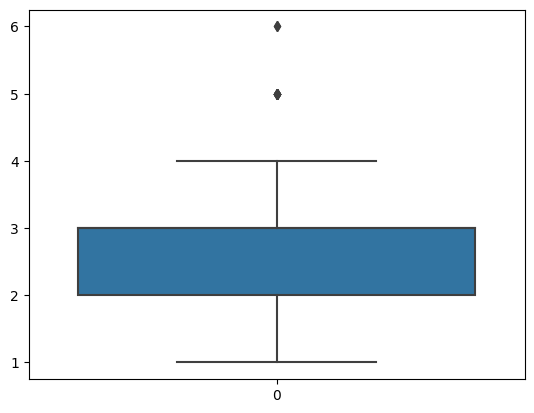

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


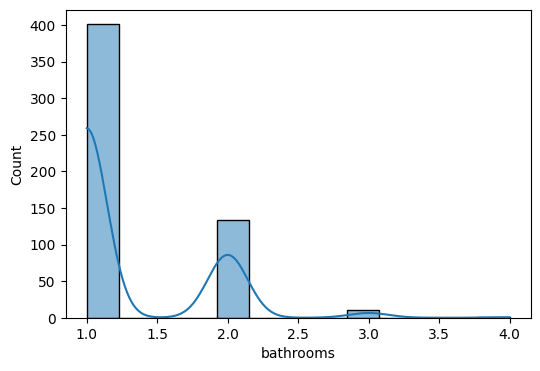

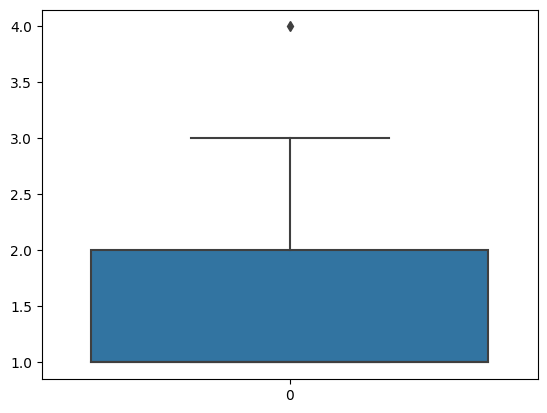

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


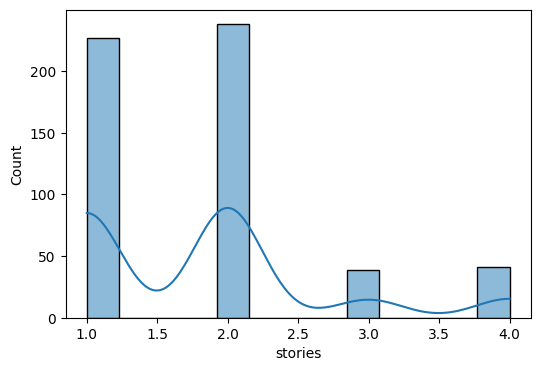

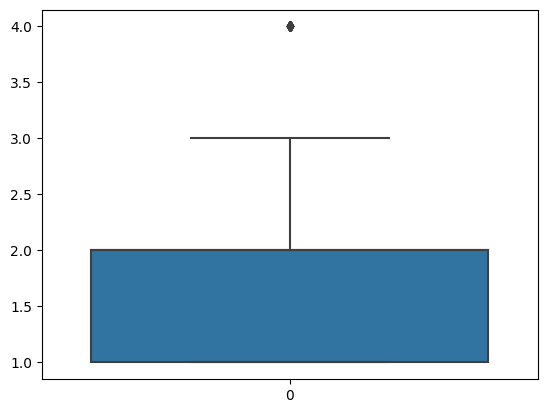

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


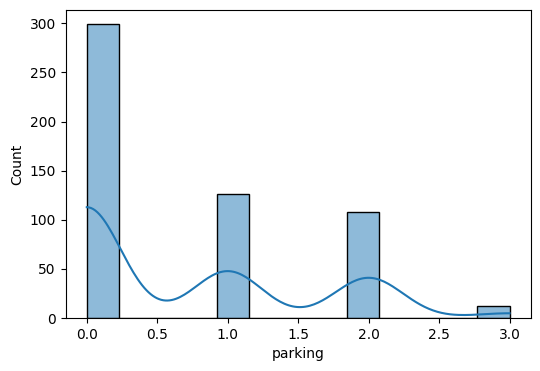

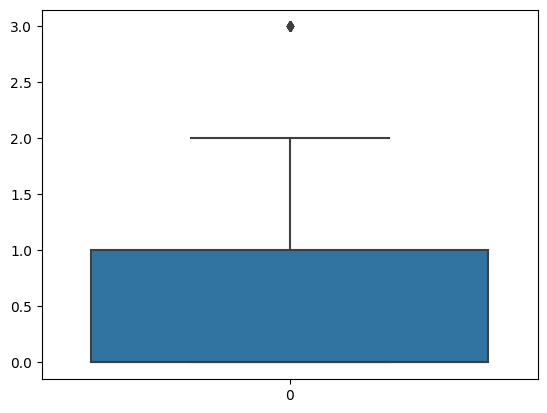

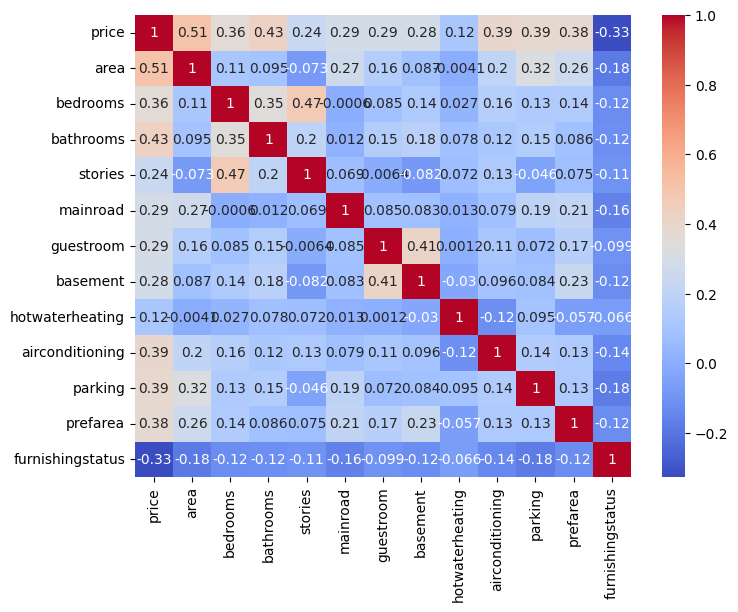

In [140]:
#Retrieving numeric and categorical features in seperate lists
numeric_cols=list(df.select_dtypes(include=['int64','float64']).columns)
category_cols=list(df.select_dtypes(include='object').columns)

#Plotting boxplots for checking outliers
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df[col],kde=True)
    plt.show()
    sns.boxplot(data=df[col])
    plt.show()

#Outliers removal
df=df[~df['bedrooms'].isin([5,6])]
df=df[df['bathrooms']!=4]
df=df[df['stories']!=4]
df=df[df['parking']!=3]

#Label Encoding
le=LabelEncoder()
for col in category_cols:
    df[col]=le.fit_transform(df[col])

#Scaling the data using MinMaxScaler
mms=MinMaxScaler()
df=pd.DataFrame(mms.fit_transform(df),columns=df.columns)

#Correlation Matrix
corr_df=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_df,cmap="coolwarm",annot=True)
plt.show()

Training Linear Regression Model

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=df.drop(columns='price')
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Prediction and Evaluation

In [142]:
y_pred=lr.predict(x_test)
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse,r2_score
print("Mean Absolute Error:",mae(y_test,y_pred))
print("Mean Squared Error:",mse(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 0.06710437833834038
Mean Squared Error: 0.009146961039920529
R2 Score: 0.6763248433706308


Plotting the regression line

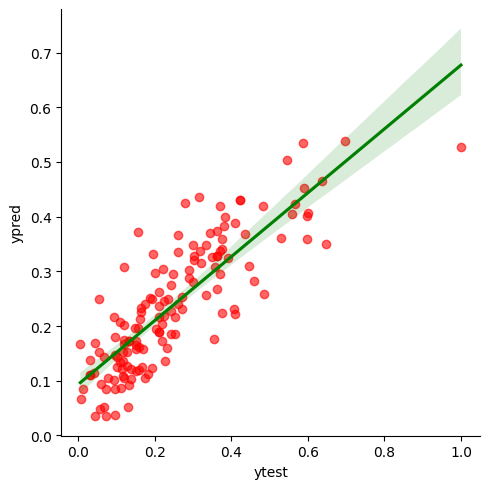

In [143]:
plot_df=pd.DataFrame({'ytest':y_test,'ypred':y_pred})
sns.lmplot(x='ytest',y='ypred',data=plot_df,
           line_kws={'color':'green'},
           scatter_kws={'color':'red','alpha':0.6})
plt.show()